In [1]:
import time
import torch

In [2]:
from enfy import DataModule
from enfy import FashionMNIST

In [3]:
data = FashionMNIST(resize=(32, 32))

In [4]:
len(data.train), len(data.val)

(60000, 10000)

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [6]:
type(data.train)

torchvision.datasets.mnist.FashionMNIST

In [7]:
from enfy import add_to_class

In [8]:
@add_to_class(FashionMNIST)
def text_labels(self, indices):
    labels = ["t-shirt", "trouser", "pullover", "dress", "coat",
              "sandal", "shirt", "sneaker", "bag", "ankle boot"]
    
    return [labels[int(i)] for i in indices]

# Reading a Minibatch

In [9]:
X, y = next(iter(data.train_dataloader()))

In [10]:
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [11]:
tic = time.time()

for X, y in data.train_dataloader():
    continue

print(f'{time.time() - tic:.2f} sec')

2.07 sec


In [12]:
from enfy import show_images

In [13]:
batch = next(iter(data.val_dataloader()))

In [14]:
len(batch)

2

In [15]:
batch[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [16]:
batch[1]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

In [17]:
batch[0].shape

torch.Size([64, 1, 32, 32])

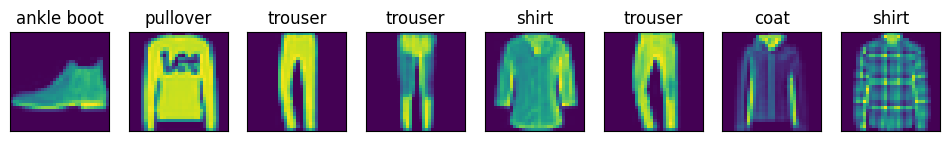

In [18]:
data.visualize(batch)

In [19]:
from enfy import Module

In [20]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

In [21]:
X.sum(0, keepdims=True)

tensor([[5., 7., 9.]])

In [22]:
X.sum(1, keepdims=True)

tensor([[ 6.],
        [15.]])

In [23]:
X.sum(0)

tensor([5., 7., 9.])

In [24]:
X.sum(0).shape

torch.Size([3])

In [25]:
X.sum(1)

tensor([ 6., 15.])

In [26]:
X.sum(1).shape

torch.Size([2])

In [27]:
from enfy import softmax

In [28]:
X = torch.rand((2, 5))

In [29]:
X_prob = softmax(X)

In [30]:
X_prob, X_prob.sum(1)

(tensor([[0.1893, 0.1539, 0.1560, 0.2259, 0.2749],
         [0.1356, 0.2184, 0.1866, 0.2971, 0.1622]]),
 tensor([1.0000, 1.0000]))

In [31]:
y = torch.tensor([0, 2])

In [32]:
y

tensor([0, 2])

In [33]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])

In [34]:
y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [35]:
y_hat[0, 0]

tensor(0.1000)

In [36]:
y_hat[1, 2]

tensor(0.5000)

In [37]:
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [38]:
from enfy import cross_entropy

In [39]:
list(range(len(y_hat)))

[0, 1]

In [40]:
cross_entropy(y_hat, y)

tensor(1.4979)

In [41]:
data = FashionMNIST(batch_size=256)

In [42]:
from enfy import SoftmaxRegressionScratch

In [43]:
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)

In [44]:
from enfy import Trainer

In [45]:
trainer = Trainer(max_epochs=10)

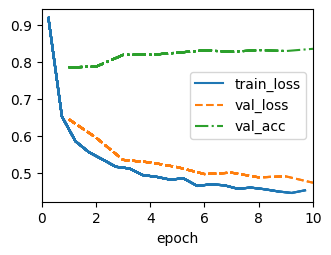

In [46]:
trainer.fit(model, data)

In [47]:
XW = torch.rand((256, 10))

In [48]:
b = torch.rand(10, )

In [49]:
XW

tensor([[0.7664, 0.0564, 0.9682,  ..., 0.5537, 0.6014, 0.6160],
        [0.4233, 0.2651, 0.6737,  ..., 0.3992, 0.4286, 0.2783],
        [0.2051, 0.5529, 0.9522,  ..., 0.1882, 0.7735, 0.3923],
        ...,
        [0.7149, 0.6749, 0.8625,  ..., 0.9304, 0.9807, 0.3920],
        [0.5743, 0.4901, 0.1360,  ..., 0.0469, 0.9251, 0.9344],
        [0.5993, 0.8063, 0.8785,  ..., 0.3222, 0.4923, 0.3644]])

In [50]:
b

tensor([0.9064, 0.2315, 0.7765, 0.9391, 0.7972, 0.0066, 0.5824, 0.5378, 0.1625,
        0.9786])

In [51]:
XW + b

tensor([[1.6728, 0.2879, 1.7447,  ..., 1.0916, 0.7639, 1.5946],
        [1.3297, 0.4965, 1.4502,  ..., 0.9371, 0.5911, 1.2570],
        [1.1115, 0.7843, 1.7287,  ..., 0.7260, 0.9360, 1.3709],
        ...,
        [1.6213, 0.9063, 1.6390,  ..., 1.4683, 1.1431, 1.3707],
        [1.4807, 0.7216, 0.9125,  ..., 0.5847, 1.0876, 1.9130],
        [1.5056, 1.0378, 1.6550,  ..., 0.8600, 0.6548, 1.3431]])

In [52]:
re_b =  torch.reshape(b, (-1, len(b)))

In [53]:
re_b.shape

torch.Size([1, 10])

In [54]:
XW + re_b

tensor([[1.6728, 0.2879, 1.7447,  ..., 1.0916, 0.7639, 1.5946],
        [1.3297, 0.4965, 1.4502,  ..., 0.9371, 0.5911, 1.2570],
        [1.1115, 0.7843, 1.7287,  ..., 0.7260, 0.9360, 1.3709],
        ...,
        [1.6213, 0.9063, 1.6390,  ..., 1.4683, 1.1431, 1.3707],
        [1.4807, 0.7216, 0.9125,  ..., 0.5847, 1.0876, 1.9130],
        [1.5056, 1.0378, 1.6550,  ..., 0.8600, 0.6548, 1.3431]])

# Prediction

In [55]:
X, y = next(iter(data.val_dataloader()))

In [56]:
preds = model(X).argmax(axis=1)

In [57]:
preds.shape

torch.Size([256])

In [58]:
wrong = preds.type(y.dtype) != y

In [59]:
wrong

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True, False, False,
         True,  True, False,  True, False,  True, False,  True, False,  True,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False,  True, False, False, False, False, False,  True,
         True,  True, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, 

In [60]:
wrong.shape

torch.Size([256])

In [61]:
wrong.dtype

torch.bool

In [62]:
wrong = wrong.reshape((256))

In [63]:
wrong.shape

torch.Size([256])

In [64]:
X_, y_, preds_ = X[wrong], y[wrong], preds[wrong]

In [65]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [66]:
y

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0,
        1, 6, 1, 6, 2, 2, 4, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7,
        4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2,
        1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4,
        5, 6, 9, 2, 6, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2])

In [67]:
preds

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 6, 7, 7, 7,
        1, 2, 6, 3, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 6, 7, 2, 1,
        2, 6, 6, 2, 5, 6, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        6, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0,
        1, 6, 1, 3, 2, 2, 6, 2, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7,
        4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 8, 7, 9, 9, 4, 4, 7, 1, 2,
        1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 4, 8, 5, 3, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2,
        5, 4, 9, 6, 2, 8, 6, 4, 6, 4, 9, 7, 4, 5, 5, 4])

# Concise Implementation of Softmax Regression

In [68]:
import torch
from torch import nn
from torch.nn import functional as F

In [69]:
from enfy import Classifier
from enfy import add_to_class

In [70]:
@add_to_class(Classifier)
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1, ))

    return F.cross_entropy(
        Y_hat, Y, reduction="mean" if averaged else "none"
    )

# Training

In [71]:
from enfy import SoftmaxRegression
from enfy import FashionMNIST

In [72]:
data = FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)

/root/anaconda3/envs/papers/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


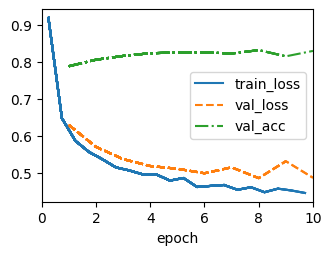

In [73]:
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)